# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from scipy import stats

%matplotlib inline
%pylab inline

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
plt.style.use(['seaborn-white'])


df = pd.read_csv('data/human_body_temperature.csv')

Populating the interactive namespace from numpy and matplotlib


## Preparations
***

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.shape

(130, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
df.isnull().sum()/len(df)*100

temperature    0.0
gender         0.0
heart_rate     0.0
dtype: float64

In [6]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## Question 1
***

Text(0.5,0,'temperature')

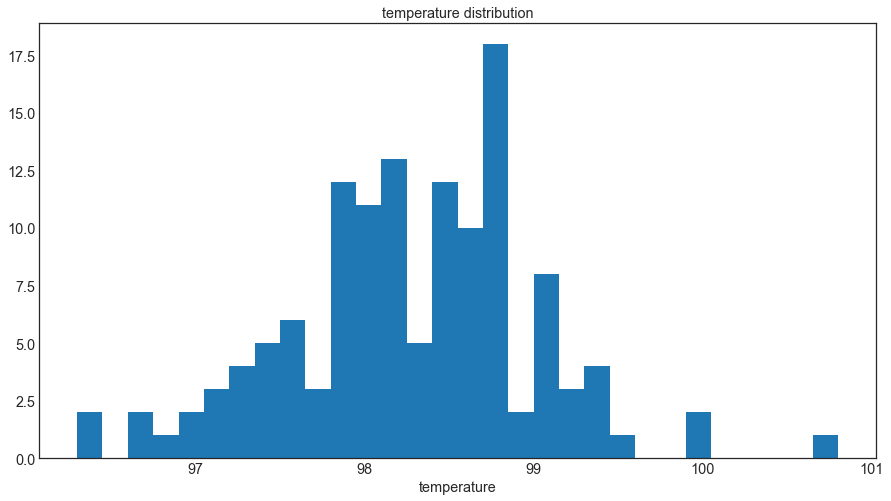

In [25]:
plt.hist(df['temperature'],bins=30)
plt.title('temperature distribution')
plt.xlabel('temperature')

The graph looks normal, but to be sure let's compute the ecdf.

In [8]:
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])

samples = np.random.normal(mean,std,size=10000)

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    n = len(data)
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / n

    return x, y

Text(0,0.5,'ECDF')

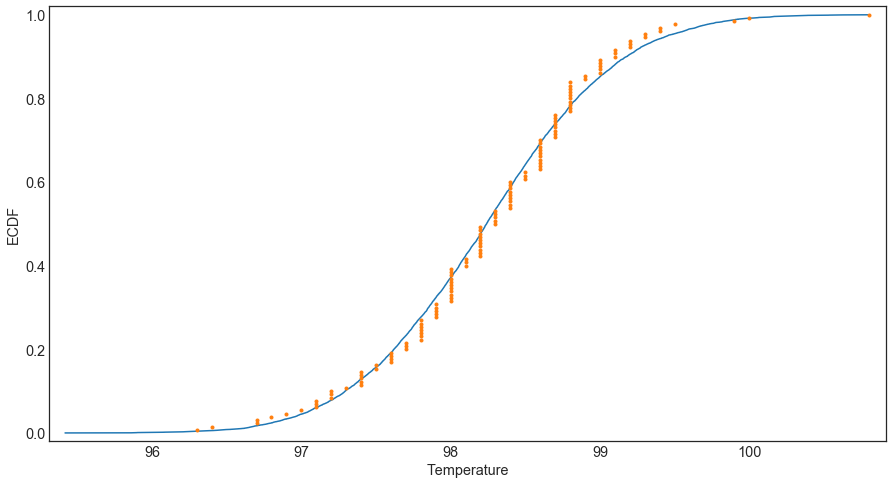

In [26]:
x, y = ecdf(df['temperature'])
x_theor, y_theor = ecdf(samples)

plt.plot(x_theor,y_theor)
plt.plot(x,y,marker = '.', linestyle = 'none')
plt.margins(0.02)
plt.xlabel('Temperature')
plt.ylabel('ECDF')

With the abscence of binning bias, it is much clearer that the temperatures are **approximately normally distributed**.

## Question 2
***

In [11]:
print('Total sample size: {}'.format(len(df)))

Total sample size: 130


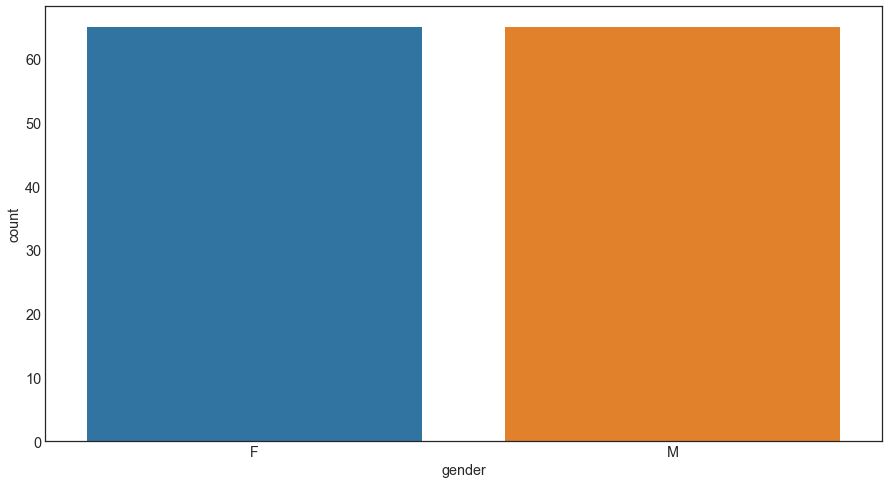

In [27]:
sns.countplot(x='gender',data=df)

Total sample is 130 making it a large enough sample also there is enough male and female patients.

Text(0.5,1,'Relationship')

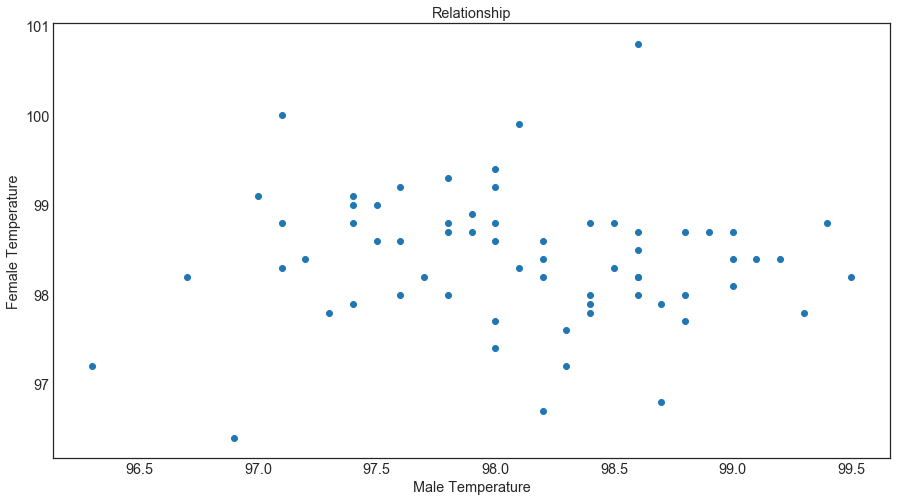

In [28]:
plt.scatter(df[df['gender']=='M']['temperature'], df[df['gender']=='F']['temperature'])
plt.xlabel('Male Temperature')
plt.ylabel('Female Temperature')
plt.title("Relationship")

Text(0,0.5,'Temperature')

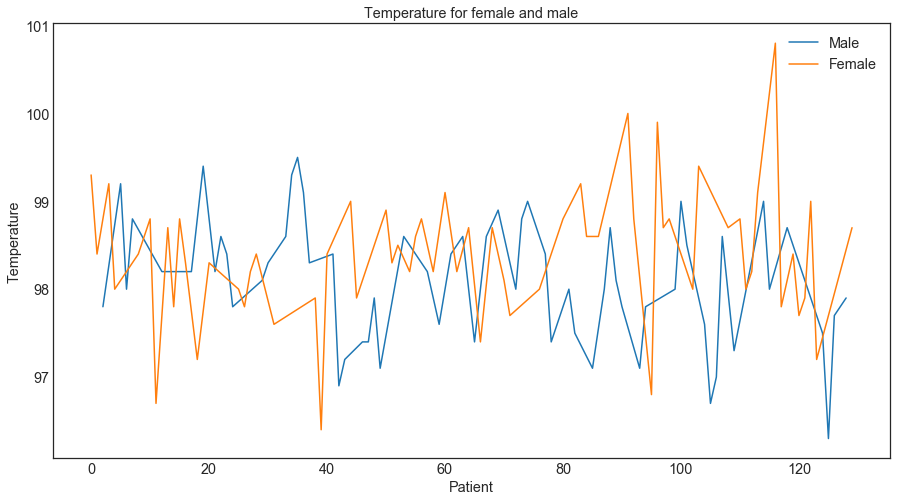

In [29]:
df[df['gender']=='M']['temperature'].plot(legend=True,label='Male')
df[df['gender']=='F']['temperature'].plot(legend=True,label='Female')
plt.title('Temperature for female and male')
plt.xlabel('Patient')
plt.ylabel('Temperature')

The graph does not show a relationship between the temperatures of male and female.

## Question 3
***

**One-sample test** will be used since the goal is to find the true population mean. There is only one group. 

The *t-test* is the most powerful parametric test for calculating the significance of a small sample mean. So in this case, let's use the **z statistic**.

In [15]:
sample_mean = df['temperature'].mean()
sample_std = df['temperature'].std()

population_mean = 98.6

z_value = (sample_mean - population_mean) / (sample_std/np.sqrt(len(df)))
p_value = 2 * (1 - stats.norm.cdf(abs(z_value)))

print('z-value is: {}'.format(z_value))
print('p-value is: {}'.format(p_value))

z-value is: -5.454823292364079
p-value is: 4.902157013653152e-08


The p-value is smaller than 0.01 so we reject the null hypothesis that the true population mean is 98.6 degrees F. 

In [16]:
print('t-statistic = %6.3f p-value = %6.4f' %  stats.ttest_1samp(df['temperature'], population_mean, axis=0))

t-statistic = -5.455 p-value = 0.0000


With t-test, the results confirms the rejection of the null hypothesis. If n>30, z-test and t-test will yield same result. We can safely say that the true population mean is **NOT** 98.6 degrees F.

## Question 4
***

In [17]:
temp = np.random.normal(df['temperature'],10)

ten_sample_mean = temp.mean()
ten_sample_std = temp.std()

population_mean = 98.6

z_value = (ten_sample_mean - population_mean) / (ten_sample_std/np.sqrt(len(df)))
p_value = 2 * (1 - stats.norm.cdf(abs(z_value)))

print('z-value is: {}'.format(z_value))
print('p-value is: {0:.10f}'.format(p_value))

z-value is: 1.084356072642275
p-value is: 0.2782069524


In [18]:
print('t-statistic = %6.3f p-value = %6.4f' %  stats.ttest_1samp(temp, population_mean,axis=0))

t-statistic =  1.080 p-value = 0.2821


With a smaller sample of 10, we fail to reject the null hypothesis. The p-value for the t-statistic is higher than z-test. The t-test is the correct one to use with a small sample size.

## Question 5
***

In [19]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

bs_replicates = draw_bs_reps(df['temperature'],np.mean,10000)
conf_int = np.percentile(bs_replicates,[0.5,99.5])

print('99% confidence interval =', conf_int)

99% confidence interval = [98.07999231 98.41538846]


With a 99% confidence, the patient can have a temperature between 98.08 and 98.41 to be considered normal. If it is outside of this interval, it should be considered **abnormal**.

## Question 6
***

In [20]:
male_mean = df[df['gender']=='M']['temperature'].mean()
female_mean = df[df['gender']=='F']['temperature'].mean()

print('Males mean temperature is: {}'.format(male_mean))
print('Females mean temperature is: {}'.format(female_mean))

Males mean temperature is: 98.1046153846154
Females mean temperature is: 98.39384615384613


On average, the temperature for females is 0.3 degrees higher. Let's check if this is significant. Since we care about the relationship between both means let's do the following hypothesis test:

$H_0:$ male_mean = female_mean

$H_a:$ female_mean > male_mean 

In [21]:
stats.ttest_ind(df[df['gender']=='F']['temperature'], 
                df[df['gender']=='M']['temperature'], axis=0, equal_var=False)

Ttest_indResult(statistic=2.285434538165611, pvalue=0.023938264182934196)

In [22]:
0.023938264182934196/2

0.011969132091467098

The p-value is smaller than 0.05. This means **reject the null hypothesis** and concluding female mean temperature is greater than male mean temperature.

In conclusion, with 99% confidence the mean normal temperature of people is between 98.08 to 98.41 degrees. Women would tend to fall on the higher interval value since the mean temperature for women is higher than men. 